In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/tika/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

# Tampilkan informasi awal
print("=== 5 Data Pertama ===")
print(df.head(), "\n")

print("=== Info Dataset ===")
print(df.info(), "\n")

print("=== Statistik Deskriptif ===")
print(df.describe(include='all'))

=== 5 Data Pertama ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [5]:
print("\n=== Jumlah Missing Values per Kolom ===")
print(df.isnull().sum())

# Persentase missing values
print("\n=== Persentase Missing Values ===")
print((df.isnull().sum() / len(df) * 100).round(2))



=== Jumlah Missing Values per Kolom ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Persentase Missing Values ===
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [6]:
# Pisahkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Isi nilai numerik yang hilang dengan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Isi nilai kategorikal yang hilang dengan modus
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\n=== Setelah Mengisi Missing Values ===")
print(df.isnull().sum())



=== Setelah Mengisi Missing Values ===
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
# Deteksi outlier dengan metode IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    if outlier_count > 0:
        print(f"Kolom {col} memiliki {outlier_count} outlier. Nilai akan dibatasi.")
        # Batasi nilai ekstrem agar tetap dalam rentang
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])


Kolom Age memiliki 66 outlier. Nilai akan dibatasi.
Kolom SibSp memiliki 46 outlier. Nilai akan dibatasi.
Kolom Parch memiliki 213 outlier. Nilai akan dibatasi.
Kolom Fare memiliki 116 outlier. Nilai akan dibatasi.


In [8]:
# Terapkan normalisasi Min-Max (rentang 0-1)
df_normalized = df.copy()
df_normalized[num_cols] = (df_normalized[num_cols] - df_normalized[num_cols].min()) / \
                          (df_normalized[num_cols].max() - df_normalized[num_cols].min())

print("\n=== Contoh Data Setelah Normalisasi ===")
print(df_normalized.head())



=== Contoh Data Setelah Normalisasi ===
   PassengerId  Survived  Pclass  \
0     0.000000       0.0     1.0   
1     0.001124       1.0     0.0   
2     0.002247       1.0     1.0   
3     0.003371       1.0     0.0   
4     0.004494       0.0     1.0   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.375000    0.4   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.682692    0.4   
2                             Heikkinen, Miss. Laina  female  0.451923    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.625000    0.4   
4                           Allen, Mr. William Henry    male  0.625000    0.0   

   Parch            Ticket      Fare    Cabin Embarked  
0    NaN         A/5 21171  0.110460  B96 B98        S  
1    NaN          PC 17599  1.000000      C85        C  
2    NaN  STON/O2. 3101282  0.120745  B96 B98        S  
3    NaN            113803 

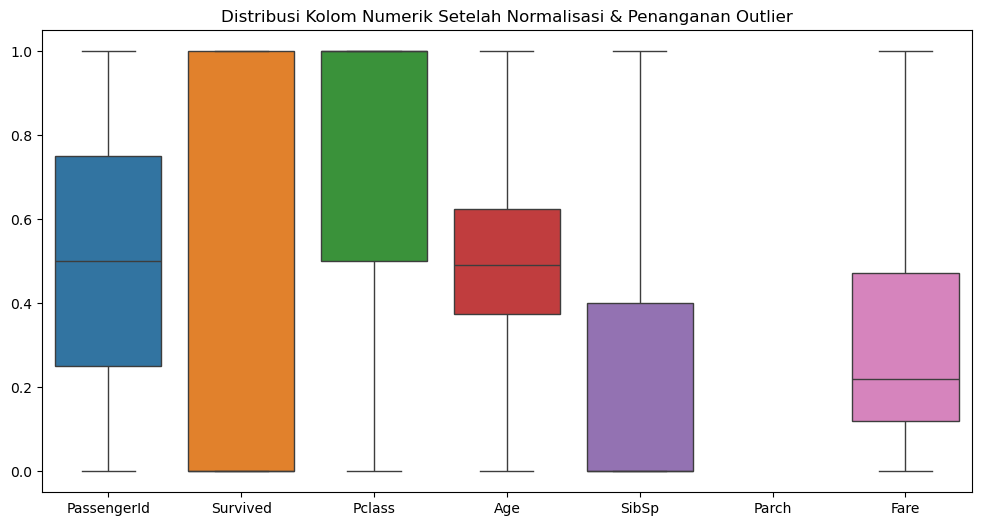

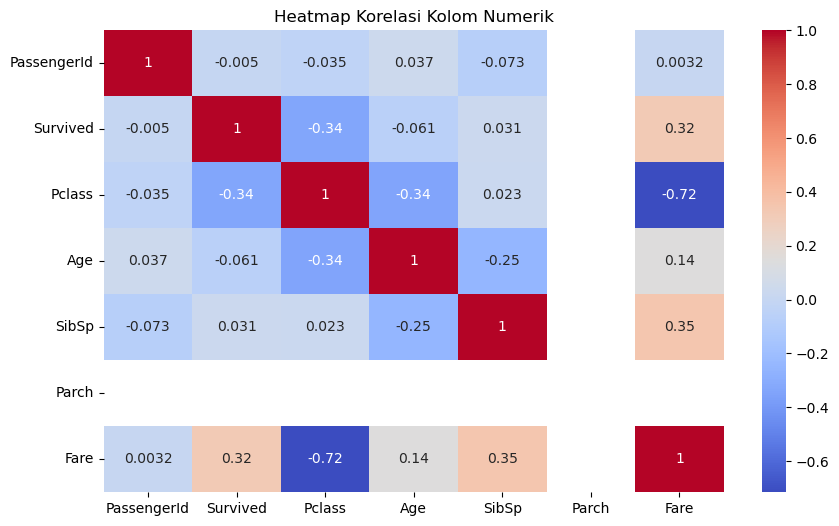

In [10]:
# Distribusi kolom numerik (setelah pembersihan dan normalisasi)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_normalized[num_cols])
plt.title("Distribusi Kolom Numerik Setelah Normalisasi & Penanganan Outlier")
plt.show()

# Korelasi antar kolom numerik
plt.figure(figsize=(10,6))
sns.heatmap(df_normalized[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Kolom Numerik")
plt.show()


In [11]:
cleaned_path = "Titanic_Cleaned.csv"
df_normalized.to_csv(cleaned_path, index=False)
print(f"\n✅ Dataset bersih berhasil disimpan sebagai: {cleaned_path}")



✅ Dataset bersih berhasil disimpan sebagai: Titanic_Cleaned.csv


In [14]:
# Cari kolom survived secara flexible
survive_col = None
for col in df.columns:
    if col.lower() == 'survived':
        survive_col = col
        break

print("Kolom Survived terdeteksi:", survive_col)


Kolom Survived terdeteksi: Survived


=== Statistik Rata-rata Berdasarkan Status Keselamatan ===

            Age   Fare  Pclass
Survived                      
0         29.62  18.92    2.53
1         28.11  32.28    1.95


/tmp/ipykernel_3329/2758967502.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=survive_col, y='Age', ax=axes[0], palette='pastel')
/tmp/ipykernel_3329/2758967502.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=survive_col, y='Fare', ax=axes[1], palette='muted')


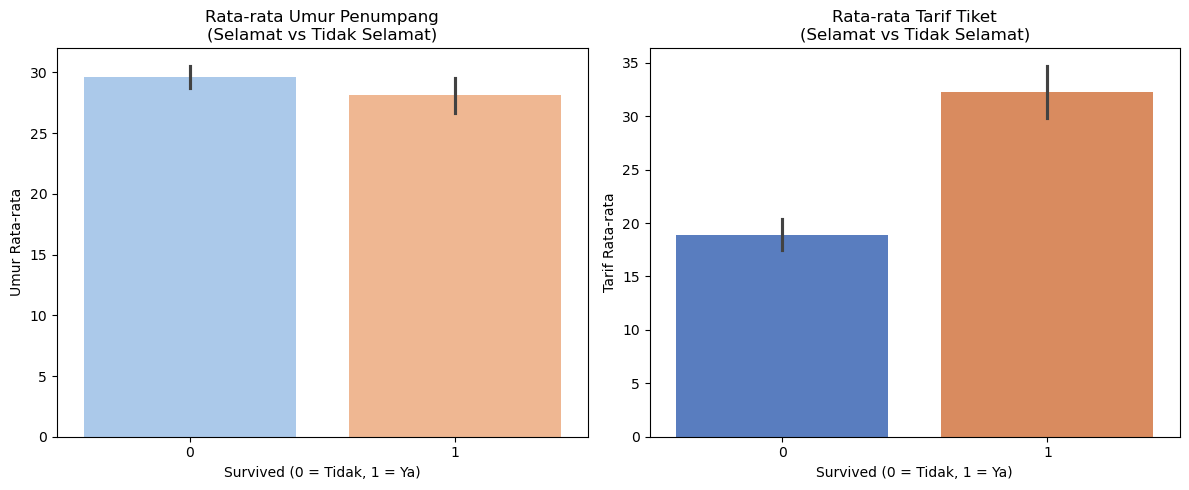

In [15]:
survive_col = 'Survived'  # sesuai hasil pemeriksaan

print("=== Statistik Rata-rata Berdasarkan Status Keselamatan ===\n")

summary = df.groupby(survive_col)[['Age', 'Fare', 'Pclass']].mean().round(2)
print(summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x=survive_col, y='Age', ax=axes[0], palette='pastel')
axes[0].set_title("Rata-rata Umur Penumpang\n(Selamat vs Tidak Selamat)")
axes[0].set_xlabel("Survived (0 = Tidak, 1 = Ya)")
axes[0].set_ylabel("Umur Rata-rata")

sns.barplot(data=df, x=survive_col, y='Fare', ax=axes[1], palette='muted')
axes[1].set_title("Rata-rata Tarif Tiket\n(Selamat vs Tidak Selamat)")
axes[1].set_xlabel("Survived (0 = Tidak, 1 = Ya)")
axes[1].set_ylabel("Tarif Rata-rata")

plt.tight_layout()
plt.show()
